In [1]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt

# Allow plots to appear in the notebook.
%matplotlib inline

### residual plot activity

In [2]:
boston = load_boston()
boston_df=pd.concat([pd.DataFrame(boston.data, columns=boston.feature_names),
                     pd.DataFrame(boston.target, columns=['MEDV'])],axis=1).sample(frac=1)
boston_df.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
424,8.79212,0.0,18.1,0.0,0.584,5.565,70.6,2.0635,24.0,666.0,20.2,3.65,17.16,11.7


In [3]:
X = boston_df[boston.feature_names].drop(['CHAS','RAD'],axis=1)
y = boston_df['MEDV']

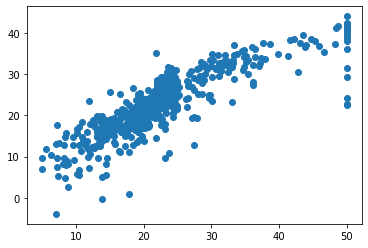

In [10]:
# create regression instance
lr_unscaled = LinearRegression()
# fit regression
lr_unscaled.fit(X,y)
# make predictions
y_preds_unscaled = lr_unscaled.predict(X)
# plot residuals
plt.scatter(x=y,y=y_preds_unscaled);

### This scatter plot is lousy. Referencing the content from the data visualization class, label the plot axes and enlarge the figure.


### Why do we use a train test split and how does it work?

![train_test_split](./assets/train_test_split.png)

### Can you think of any drawbacks to only testing on one subset of the data?

# Cross Validation


With cross validation, we will create many training groups and many test groups then fit many models.

![](./assets/cross_validation_diagram.png)

In [6]:
for i in range (0,3):
    print(round((X.shape[0]/3)*i,round((X.shape[0]/3*(i+1)))

SyntaxError: unexpected EOF while parsing (<ipython-input-6-cdb50d29ad40>, line 2)

In [8]:
from sklearn.model_selection import cross_validate
import numpy as np
# instantiate
lr = LinearRegression()
# pass estimator, predictor matrix, target variable, scoring function, number of folds into function
scores = cross_validate(lr, X, y, scoring='neg_mean_squared_error',cv=5, return_train_score=False)
# returns a dictionary
scores['test_score']


# 3 fold cross validation
# for i in range(0,3):
    #get 1/3 of the data and assign to train
#    xiloc[(X.shape[0]/3)*i:(X.shape)]





#create our feature matrix and target variable
# X = boston_df[boston.feature_names].drop(['CHAS','RAD']),axis=1)
# y = boston_df['MEDV']

#split data into train and test - default split is 75/25 train/test; you can modify
# X_train, X_test, y_train, y_test = train_test_split(X,y)

#instantiate model
# lr = LinearRegression()

#fit model on training split
# lr.fit(X_train, y_train)

#make predictions
# y_hat = lr.predict (X_test)

#score error
# np.sqrt(mean_squared_error(y_test,y_hat))

array([-32.03810217, -22.34281422, -28.0356425 , -23.91991711,
       -19.17909057])

### Interpreting the output

In [11]:
# with sk learn metrics, higher values are always better. Where optimal error is zero, values are negative so that 
# low error becomes a high value relative to high error. Taking the absolute value puts this back into conventional
# terms

# the average root mean squared error 
print(np.mean(np.sqrt(abs(scores['test_score']))))

4.990420438230179


In [14]:
# looking at the spread of the individual error values gives us a sense of our variance
print(np.sqrt(abs(scores['test_score'])))

[5.66022104 4.72681862 5.29486945 4.89079923 4.37939386]


In [15]:
# there are a lot of scorers we could pass into cross validate and otherwise access
from sklearn import metrics
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

### Codealong: let's code the steps that need to happen under the hood in order for cross validate to return a bunch of scores

**normal workflow for fitting a model**

**adapted workflow for cross validation**

## Feature Scaling

### unscaled coefficients

In [16]:
boston['DESCR'].split('\n')[11:26]

['    :Attribute Information (in order):',
 '        - CRIM     per capita crime rate by town',
 '        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.',
 '        - INDUS    proportion of non-retail business acres per town',
 '        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
 '        - NOX      nitric oxides concentration (parts per 10 million)',
 '        - RM       average number of rooms per dwelling',
 '        - AGE      proportion of owner-occupied units built prior to 1940',
 '        - DIS      weighted distances to five Boston employment centres',
 '        - RAD      index of accessibility to radial highways',
 '        - TAX      full-value property-tax rate per $10,000',
 '        - PTRATIO  pupil-teacher ratio by town',
 '        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town',
 '        - LSTAT    % lower status of the population',
 "        - MEDV     Median value of owne

In [ ]:
X.head(1)

In [17]:
# how easy is this to intepret?
pd.DataFrame(lr_unscaled.coef_,X.columns).T

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,-0.070101,0.039889,-0.041982,-14.579486,4.18825,-0.001868,-1.502899,0.000833,-0.873822,0.008843,-0.526729


## standardization

### $$ X_{std} = \frac{X - \bar{X}}{s_{X}} $$

In [18]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B',
       'LSTAT'],
      dtype='object')

In [19]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
# fit is basically: calculate the mean and standard deviation of each column
# transform is: subtract the mean then divide by the standard deviation
# fit_transform is do it in one step
X_scaled = X.copy()
X_scaled[X_scaled.columns] = ss.fit_transform(X_scaled)
X_scaled.head(2)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
424,0.602650,-0.487722,1.015999,0.253146,-1.025233,0.072014,-0.823122,1.530926,0.806576,-3.870682,0.631754
247,-0.397642,0.456508,-0.769931,-1.068519,-0.083534,0.377835,2.025290,-0.464673,0.297977,0.213432,-0.350864


In [20]:
# create regression instance
lr_scaled = LinearRegression()
# fit regression
lr_scaled.fit(X_scaled,y)
# make predictions
y_preds_scaled = lr_scaled.predict(X_scaled)

In [21]:
print('rmse for unscaled preds')
print(np.sqrt(mean_squared_error(y, y_preds_unscaled)))
print('rmse for scaled preds')
print(np.sqrt(mean_squared_error(y, y_preds_scaled)))

rmse for unscaled preds
4.840460301538274
rmse for scaled preds
4.840460301538274


In [ ]:
boston['DESCR'].split('\n')[11:26]

In [22]:
# features now in units of standard deviation
X_scaled.head(1)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
424,0.60265,-0.487722,1.015999,0.253146,-1.025233,0.072014,-0.823122,1.530926,0.806576,-3.870682,0.631754


In [23]:
# coeficients also in units of standard deviation
pd.DataFrame(lr_scaled.coef_,X.columns).T

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,-0.602385,0.929397,-0.287726,-1.687767,2.939827,-0.052528,-3.161541,0.140321,-1.889906,0.806484,-3.757688


### Why bother with feature scaling a linear regression when it doesn't change the score?

### What's the context for when we wouldn't want to fit_transform the standard scaler, e.g. only transform?